In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
maxAll = df.max()
minAll = df.min()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY, maxAll, " ", minAll, sep = '\n')

2.3134926739926738
2.4922985347985356
4.6584212454212475
1.741797285664983
0.8110039291512505
1.6652150617992907
MLOGP                             9.148
RDCHI                             6.439
quantitative response of LC50    10.047
dtype: float64
 
MLOGP                           -6.446
RDCHI                            1.000
quantitative response of LC50    0.122
dtype: float64


In [4]:
df1 = df.copy()
df1

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [5]:
df['MLOGP'] = (df['MLOGP'] - df['MLOGP'].min())/(df['MLOGP'].max() - df['MLOGP'].min())
df['RDCHI'] = (df['RDCHI'] - df['RDCHI'].min())/(df['RDCHI'].max() - df['RDCHI'].min())
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [6]:
print(df.max(), df.min(), sep = '\n')
df

MLOGP                             1.000
RDCHI                             1.000
quantitative response of LC50    10.047
dtype: float64
MLOGP                            0.000
RDCHI                            0.000
quantitative response of LC50    0.122
dtype: float64


,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [7]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [8]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
109,0.569386,0.352087,8.564
353,0.547134,0.267512,3.047
222,0.698859,0.342342,6.508
315,0.509940,0.157566,5.371
40,0.625369,0.336827,4.301
...,...,...,...
430,0.598820,0.457253,3.619
231,0.556111,0.073727,3.339
333,0.474734,0.889686,4.566
384,0.613890,0.288656,5.380


In [9]:
test

,MLOGP,RDCHI,quantitative response of LC50
345,0.393485,0.168781,4.221
81,0.559189,0.211436,3.700
385,0.370720,0.133480,3.589
193,0.602026,0.169884,3.524
43,0.538220,0.184777,3.061
...,...,...,...
79,0.645376,0.403935,4.878
334,0.418238,0.154440,3.788
199,0.649160,0.247104,4.980
86,0.597345,0.385181,6.188


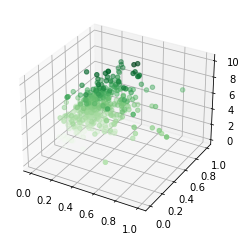

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [11]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
109,0.352087,0.569386
353,0.267512,0.547134
222,0.342342,0.698859
315,0.157566,0.509940
40,0.336827,0.625369
...,...,...
430,0.457253,0.598820
231,0.073727,0.556111
333,0.889686,0.474734
384,0.288656,0.613890


In [12]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
109,8.564
353,3.047
222,6.508
315,5.371
40,4.301
...,...
430,3.619
231,3.339
333,4.566
384,5.380


In [13]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.35208678065820925


In [14]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
345,0.168781,0.393485
81,0.211436,0.559189
385,0.133480,0.370720
193,0.169884,0.602026
43,0.184777,0.538220
...,...,...
79,0.403935,0.645376
334,0.154440,0.418238
199,0.247104,0.649160
86,0.385181,0.597345


In [15]:
testY

,quantitative response of LC50
345,4.221
81,3.700
385,3.589
193,3.524
43,3.061
...,...
79,4.878
334,3.788
199,4.980
86,6.188


In [16]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
0.16878102592388305


In [17]:
iters = 10000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [18]:
TrainErr = np.array([])
TestErr = np.array([])

w0 = 4.6977568807339445


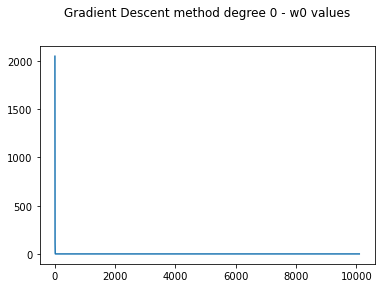

In [19]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.sum(valY-w))
    #print(w1,w)

    counter+=1
    costArr[counter] = (np.sum(valY-w))
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 0 - w0 values", y = 1, pad = 30)
plt.show() 

In [20]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,0]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.4352802204465125

In [21]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1842428383107861

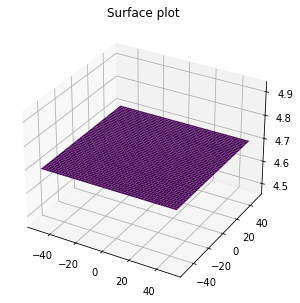

In [22]:
degree = 0
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
k=0
z = w*(x**k)*(y**k)
        

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [23]:
degree = 1

In [24]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.001733553842826
w1=1.4382395064070155
w2=2.373853649314195


436

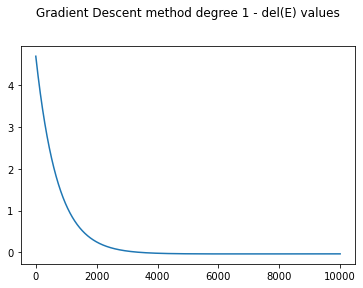

In [25]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [26]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.1349856742194513

In [27]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.9009016726364467

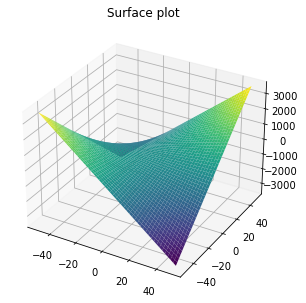

In [28]:
x = np.arange(-50,50,0.1)
y = x[::-1].copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [29]:
degree = 2

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 3

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 4

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 5

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 6

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 7

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 8

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
degree = 9

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [ ]:
TrainErr

In [ ]:
TestErr

In [ ]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [ ]:
iters = 300000
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [ ]:
TrainErr = np.array([])
TestErr = np.array([])

In [ ]:
k = np.random.randint(low = 0, high = np.shape(valX)[0])
k

In [ ]:
degree = 0

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 1

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 2

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 3

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 4

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 5

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 6

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 7

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 8

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
degree = 9

In [ ]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

In [ ]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [ ]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

In [ ]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

In [ ]:
TrainErr

In [ ]:
TestErr

In [ ]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [ ]:
# degree 0
iters = 3000
learningRate = 0.01
degree = 0
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[k,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 0 - del(E) values", y = 1, pad = 30)
plt.show()  

In [ ]:
# degree 1
iters = 3000
learningRate = 0.01
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 1 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 2
iters = 3000
learningRate = 0.01
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 2 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 3
iters = 3000
learningRate = 0.01
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 3 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 4
iters = 300000
learningRate = 0.01
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 4 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 5
iters = 300000
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 5 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 6
iters = 300000
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 6 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 7
iters = 300000
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 7 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 8
iters = 300000
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 8 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 9
iters = 300000
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += ((((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0])
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-10])
plt.title("Stochastic Gradient Descent method degree 9 - del(E) values", y = 1, pad = 30)
plt.show() 